# examining the effect of population on the CATE 

In [1]:
import numpy as np
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## load CATE measurements

In [2]:
cv_cates = np.load('../dat/typology_covar.npy', allow_pickle=True)
cates    = np.load('../dat/typology_cate.npy', allow_pickle=True)
treats   = np.load('../dat/typology_y_treat.npy', allow_pickle=True)
controls = np.load('../dat/typology_y_control.npy', allow_pickle=True)
sig_cates= np.load('../dat/typology_sig_cate.npy', allow_pickle=True)

In [3]:
lbls = ['Precipitation (mm)', 'FSF Risk Score', 'Median Household Income (dollars)', 'Population',
        'Renter Fraction', 'Educated Fraction', 'White Fraction']

In [4]:
outreach_correction = 9780.

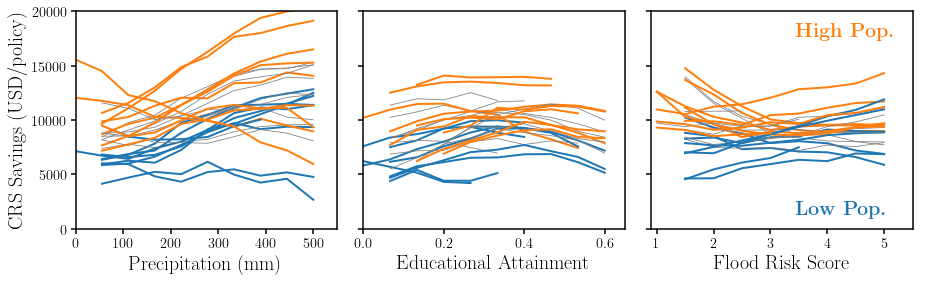

In [6]:
_ranges = [(0., 550.), (0.9, 5.5), (2.5e4, 1e5), (0, 4.5e4), (0., 0.75), (0., 0.65), (0.0, 1.)]

_i = 0
fig = plt.figure(figsize=(15, 4))
for ii_covar, i_covar in zip([0, 2, None, 1], [0, 1, 4, 5]):
    if ii_covar is not None: 
        sub = fig.add_subplot(1,3,ii_covar+1)
    for i_inc in range(3): 
        for i_pop in range(3): 
            for i_div in range(3): 
                if ii_covar is not None: 
                    sub.plot(cv_cates[_i], outreach_correction-1*np.array(cates[_i]), 
                             c=['C0', 'gray', 'C1'][i_pop], lw=[2, 0.8, 2][i_pop])
                    sub.set_xlabel(['Precipitation (mm)', 'Flood Risk Score', 'Median Household Income (dollars)', 'Population',
                                    'Renter Fraction', 'Educational Attainment', 'White Fraction'][i_covar], fontsize=20)        
                    sub.set_xlim(_ranges[i_covar][0], _ranges[i_covar][1])
                    sub.set_ylim(0., 20000.)
                _i += 1    
                if i_covar not in [0]: sub.set_yticklabels([])
                    
    if ii_covar == 2: 
        sub.text(0.55, 0.95, r'{\bf High Pop.}', transform=sub.transAxes, 
                 color='C1', fontsize=20, ha='left', va='top')
        sub.text(0.55, 0.05, r'{\bf Low Pop.}', transform=sub.transAxes,
                 color='C0', fontsize=20, ha='left', va='bottom')
            
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_ylabel(r'CRS Savings (USD/policy)', fontsize=20, labelpad=22)
fig.subplots_adjust(wspace=0.1)
fig.savefig('cate_pop.pdf', bbox_inches='tight')